In [2]:
import pandas as pd
from pathlib import Path
from pandas import DataFrame
import numpy as np


In [3]:
monthlydata = DataFrame(pd.read_csv(
    Path('monthly_reportcsvs/aggInhouse2022.csv'), 
    parse_dates=True, 
    infer_datetime_format=True)
)

#for individual files with the total row at the bottom
#monthlydata.drop(monthlydata.tail(2).index,
        #inplace = True)

In [4]:
print(monthlydata.nunique(axis=0))
display(monthlydata)

departs               181
booked                184
guest_name           1972
guest_email          1872
checkin_status          3
checkin_status_ts    1545
room                   17
unit                  122
los                    26
adr                     0
total                 628
other                   1
balance               165
etc                    76
dtype: int64


,departs,booked,guest_name,guest_email,checkin_status,checkin_status_ts,room,unit,los,adr,total,other,balance,etc
0,1/16/2022,1/15/2022,Brooke Adams (pet),brookie_3434@hotmail.com,Checked Out,1/16/2022 13:45,Dog Friendly - Hotel Room with Dunes View - Do...,142,1,NaN,$165.84,$0.00,$0.00,HAS EXTRAS
1,1/18/2022,1/17/2022,Hugo Aguilar,jackiescott@dropbury.com,Checked Out,1/18/2022 10:16,Dog Friendly - Hotel Room with Dunes View - Do...,142,1,NaN,$99.48,$0.00,$0.00,"REPEAT GUEST, 22 PAST STAYS"
2,1/2/2022,12/11/2021,Erin Alden (Pets),erinmealden@gmail.com,Checked Out,1/2/2022 10:59,Hotel Room with Dunes View - Double Queen - No...,128,2,NaN,$331.68,$0.00,$0.00,HAS EXTRAS
3,1/23/2022,1/22/2022,Joseph Allard,nicksypher@gmail.com,Checked Out,1/23/2022 16:44,Hotel Room with Dunes View - Double Queen - No...,140,1,NaN,$150.26,$0.00,$0.00,NaN
4,1/30/2022,1/24/2022,Dave Allen,dallen.310287@guest.booking.com,Checked Out,1/30/2022 9:31,1st Floor Deluxe Condo - Dunes View,115,1,NaN,$232.62,$0.00,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,6/21/2022,2/14/2022,David and Karen Weissenfels,tcwdavid@gmail.com,Pending,NaN,Dog Friendly - 1st Floor Deluxe Condo - Dunes ...,107,4,NaN,$0.00,$0.00,$0.00,"REPEAT GUEST, 19 PAST STAYS\nDO NOT MOVE"
2470,6/13/2022,3/6/2022,Karen Wilson,karenwilson4000@gmail.com,Pending,NaN,3rd Floor Condo - Ocean View with Balcony,321,2,NaN,$0.00,$0.00,$0.00,"REPEAT GUEST, 13 PAST STAYS\nDO NOT MOVE"
2471,6/2/2022,11/23/2021,Peggy Wilson,carmela.manor@hotmail.com,Pending,NaN,Hotel Room - Top Floor with Ocean View and Bal...,338,4,NaN,$974.98,$0.00,$974.98,"REPEAT GUEST, 2 PAST STAYS"
2472,6/30/2022,3/6/2022,Nelia Woods,nelia.woods@gmail.com,Pending,NaN,1st Floor Condo - Dunes View,109,15,NaN,$0.00,$0.00,$0.00,"REPEAT GUEST, 20 PAST STAYS\nDO NOT MOVE"


In [5]:
#monthlydatatrim = monthlydata.drop(columns =['ARRIVES', 'BOOKED', 'GUEST', 'CHECKIN_STATUS_TS', 'ROOM'])
#print(monthlydatatrim.nunique(axis=0))

monthlydatatrim = monthlydata.drop(columns =['guest_name', 'guest_email', 'adr', 'etc'])
print(monthlydatatrim.nunique(axis=0))


#"departs", "booked", "checkin_status", "checkin_status_ts", "room", "unit", "los", "total", "other", "balance"
#newdf = monthlydatatrim[["CHECKIN_STATUS", "UNIT", "LOS", "RATE", "ADR", "TOTAL", "OTHER", "BALANCE"]].astype('string')
newdf = monthlydatatrim[["departs", "booked", "checkin_status", "checkin_status_ts", "room", "unit", "los", "total", "other", "balance"]].astype('string')

#newdf = newdf[newdf.columns[0:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',',''))
newdf = newdf[newdf.columns[0:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',',''))

#newdf[["LOS", "RATE", "ADR", "TOTAL", "OTHER", "BALANCE"]] = newdf[["LOS", "RATE", "ADR", "TOTAL", "OTHER", "BALANCE"]].apply(pd.to_numeric)
newdf[["unit", "los", "total", "other", "balance"]] = newdf[["unit", "los", "total", "other", "balance"]].apply(pd.to_numeric, errors='coerce')


display(newdf)

newdf.dtypes

departs               181
booked                184
checkin_status          3
checkin_status_ts    1545
room                   17
unit                  122
los                    26
total                 628
other                   1
balance               165
dtype: int64


C:\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  del sys.path[0]


,departs,booked,checkin_status,checkin_status_ts,room,unit,los,total,other,balance
0,1/16/2022,1/15/2022,Checked Out,1/16/2022 13:45,Dog Friendly - Hotel Room with Dunes View - Do...,142.0,1,165.84,0.0,0.00
1,1/18/2022,1/17/2022,Checked Out,1/18/2022 10:16,Dog Friendly - Hotel Room with Dunes View - Do...,142.0,1,99.48,0.0,0.00
2,1/2/2022,12/11/2021,Checked Out,1/2/2022 10:59,Hotel Room with Dunes View - Double Queen - No...,128.0,2,331.68,0.0,0.00
3,1/23/2022,1/22/2022,Checked Out,1/23/2022 16:44,Hotel Room with Dunes View - Double Queen - No...,140.0,1,150.26,0.0,0.00
4,1/30/2022,1/24/2022,Checked Out,1/30/2022 9:31,1st Floor Deluxe Condo - Dunes View,115.0,1,232.62,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
2469,6/21/2022,2/14/2022,Pending,<NA>,Dog Friendly - 1st Floor Deluxe Condo - Dunes ...,107.0,4,0.00,0.0,0.00
2470,6/13/2022,3/6/2022,Pending,<NA>,3rd Floor Condo - Ocean View with Balcony,321.0,2,0.00,0.0,0.00
2471,6/2/2022,11/23/2021,Pending,<NA>,Hotel Room - Top Floor with Ocean View and Bal...,338.0,4,974.98,0.0,974.98
2472,6/30/2022,3/6/2022,Pending,<NA>,1st Floor Condo - Dunes View,109.0,15,0.00,0.0,0.00


departs               string
booked                string
checkin_status        string
checkin_status_ts     string
room                  string
unit                 float64
los                    int64
total                float64
other                float64
balance              float64
dtype: object

unit
101.0     511.33
102.0    6089.91
103.0    4388.91
105.0    8416.96
106.0    1574.06
          ...   
339.0    3469.15
340.0    2429.57
341.0    5852.90
342.0    3350.37
343.0    6731.23
Name: total, Length: 118, dtype: float64

<AxesSubplot:xlabel='unit', ylabel='Total'>

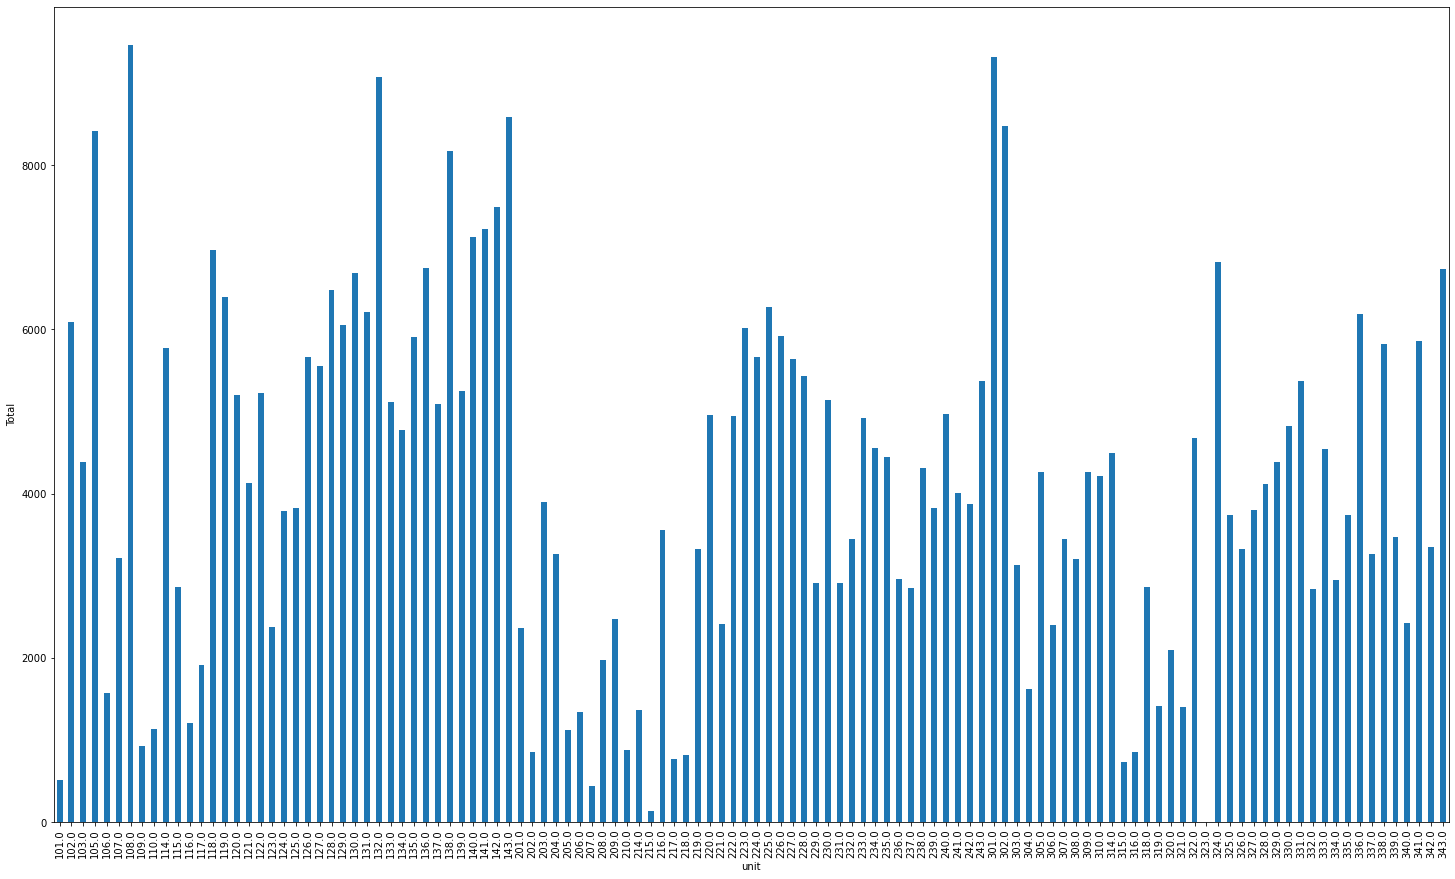

In [8]:

newdf.to_csv(Path('monthly_reportcsvs/inhouseformatted.csv'), header=True)

currentprojection = newdf.loc[newdf['checkin_status'] == 'Checked Out']
#currentprojection = newdf.iloc[['checkin_status'].isin('Checked Out')]
#display(currentprojection)

sumnewdf = currentprojection.groupby('unit')['total'].sum()
#sumnewdf = currentprojection.groupby('unit')['checkin_status', 'total'].sum()

#sumnewdf.to_csv(Path('monthly_reportcsvs/todateroomrevenue.csv'), header=True)
import matplotlib.pyplot as plt


display(sumnewdf)

#sumnewdf["unit"] = sumnewdf["unit"].astype(int)

sumnewdf.plot.bar(y='total', ylabel='Total', rot=90, figsize=(25,15))